In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
drive.mount('/content/drive')

DataFrame = '/content/drive/MyDrive/dataset/IMDB Dataset.csv'
df = pd.read_csv(DataFrame)


print(df.head(10), '\n')
print(df.info(), '\n')
print(df.describe(), '\n')
print(df.isnull().sum(), '\n')
print(df['sentiment'].value_counts())

Mounted at /content/drive
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(

In [ ]:
#49.582 reviews em 50.000 linhas -> tem 418 duplicadas
df = df.drop_duplicates(subset='review').reset_index(drop=True)
print(df.info(), '\n')
print(df.describe(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49582 entries, 0 to 49581
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 774.8+ KB
None 

                                                   review sentiment
count                                               49582     49582
unique                                              49582         2
top     No one expects the Star Trek movies to be high...  positive
freq                                                    1     24884 



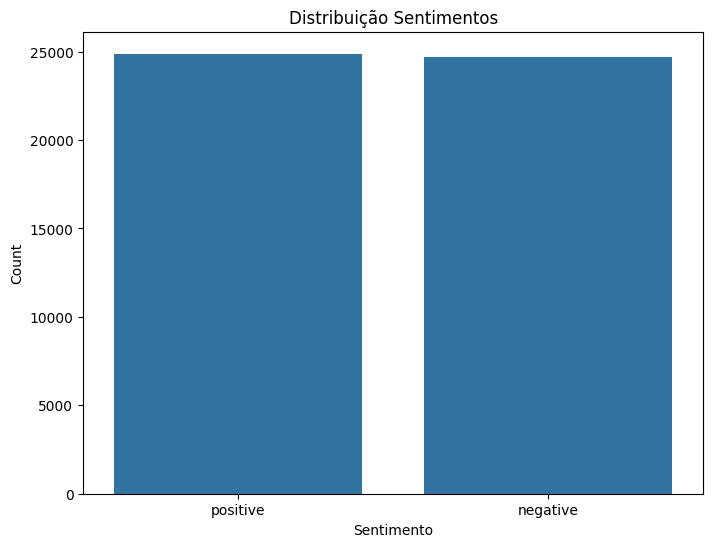

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribuição Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Count')
plt.show()

# **2- Pré-processamento**

1. Limpeza de texto -> remover elmentos não textuais, como numeros, pontuação, caracteres especiais...

2. Conversão para minúsculas -> padronizar todo o texto em letras minusculas, a fim de evitar que "Texto" seja diferente de "texto"

3. Remoção de stopwords -> remover palavras que nao agrega tanto significado semantico ("the", "and", "a"

4. Lematização ->  reduzir as palavras à sua raiz, envolve a remoção dos sufixos das palavras, por exemplo: filming seria derivada de film


5. Tokenização ->  Dividir o texto em unidades menores (tokens), que podem ser palavras, frases ou outros elementos.





- https://www.datacamp.com/pt/tutorial/text-analytics-beginners-nltk

- https://medium.com/@khalidassalafy/sentiment-analysis-with-nltk-4afbb0bf6a49  



In [ ]:
#libs de PLN
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [ ]:

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Função de limpeza completa
def clean_dataFrame(text):
    text = re.sub(r'<.*?>', '', text)     # remove tags html
    text = re.sub(r'[^\w\s]', '', text)   # remove pontuacao
    text = re.sub(r'\d+', '', text)       # remove numeros
    text = re.sub(r'\s+', ' ', text)      # remove espacos em branco
    text = text.lower()                   # converte tudo para minusculas
    tokens = word_tokenize(text)          # tranforma em tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  #remove stopwords e lematiza
    return ' '.join(tokens)

df['processed_review'] = df['review'].apply(clean_dataFrame)
print(df[['review', 'processed_review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


# **3- Analise Exploratória**

O objetivo e entender melhor a estrutura dos dados, identificar padroes e possíveis insights relevantes para a modelagem

1. Verificar a distribuicao dos sentimentos -> comprimento das reviews
2. Visualizar as palavras mais frequentes por classe
4. nuvem de palavras



In [ ]:
#tamanho das reviews
df['review_length'] = df['processed_review'].apply(lambda x: len(x.split())) # add uma nova coluna com o numero de palvras por review
print(df.columns)


Index(['review', 'sentiment', 'processed_review', 'review_length'], dtype='object')


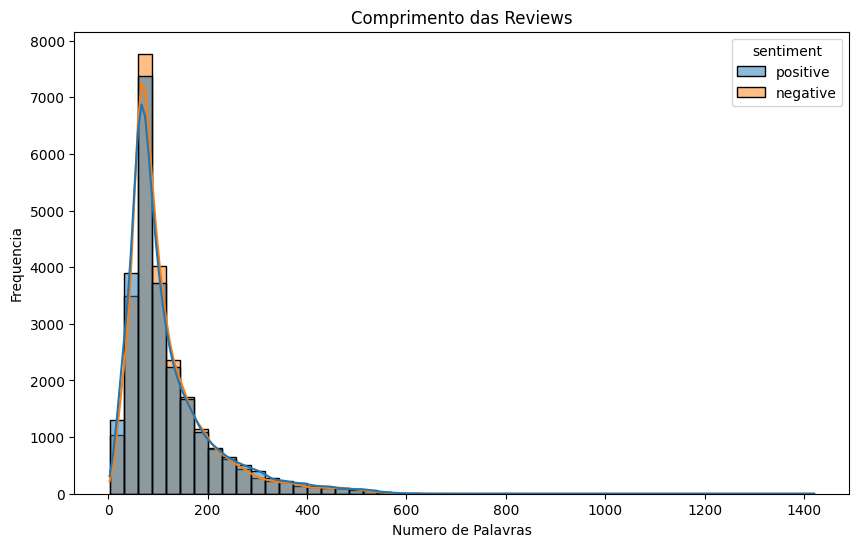

In [ ]:
# comprimento das reviews por classe
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Comprimento das Reviews')
plt.xlabel('Numero de Palavras')
plt.ylabel('Frequencia')
plt.show()


/tmp/ipython-input-30-3714975788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in top_pos],
/tmp/ipython-input-30-3714975788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in top_neg],


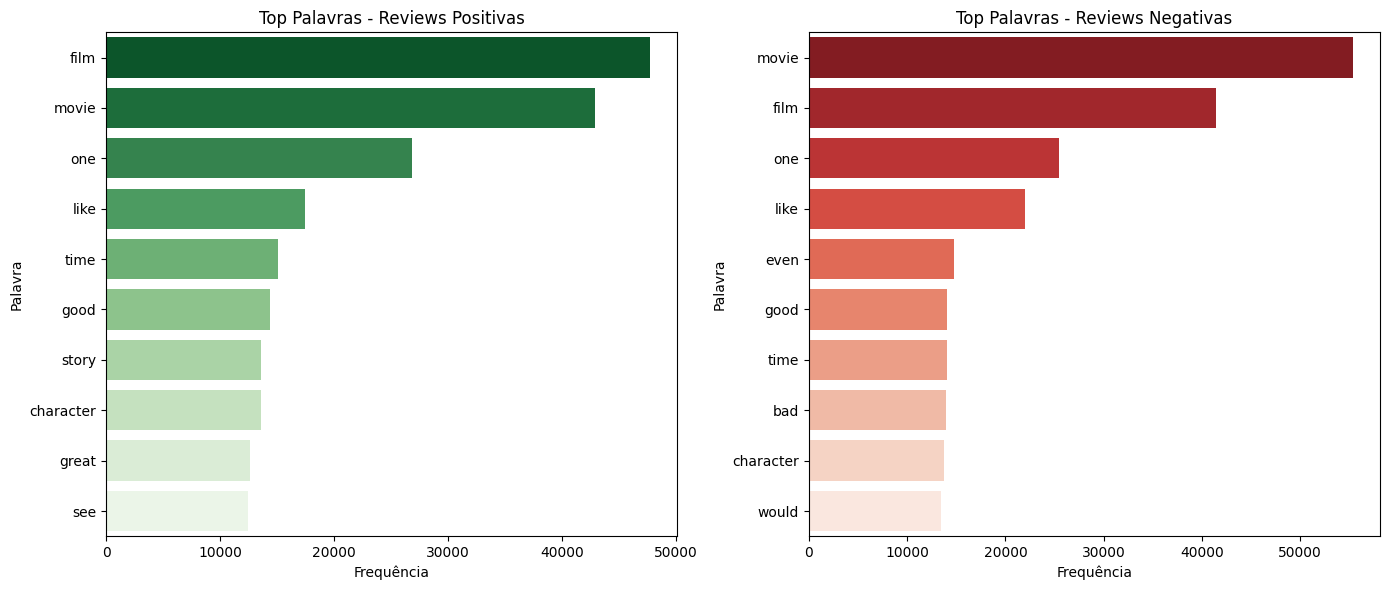

In [ ]:
from collections import Counter

#palavras mais frequentes por sentimento

reviews_pos = df[df['sentiment'] == 'positive']['processed_review']
reviews_neg = df[df['sentiment'] == 'negative']['processed_review']

text_pos= ' '.join(reviews_pos)
text_neg = ' '.join(reviews_neg)

counter_pos = Counter(text_pos.split())
counter_neg = Counter(text_neg.split())

#pega as palavras que mais aparecem em cada sentimento

top_pos = counter_pos.most_common(10) # retorna uma lista dos elementos mais comuns
top_neg = counter_neg.most_common(10)

plt.figure(figsize=(14, 6))

#positicas
plt.subplot(1, 2, 1)
sns.barplot(x=[count for word, count in top_pos],
            y=[word for word, count in top_pos], palette='Greens_r')
plt.title('Top Palavras - Reviews Positivas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

#negativas
plt.subplot(1, 2, 2)
sns.barplot(x=[count for word, count in top_neg],
            y=[word for word, count in top_neg], palette='Reds_r')
plt.title('Top Palavras - Reviews Negativas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

plt.tight_layout()
plt.show()


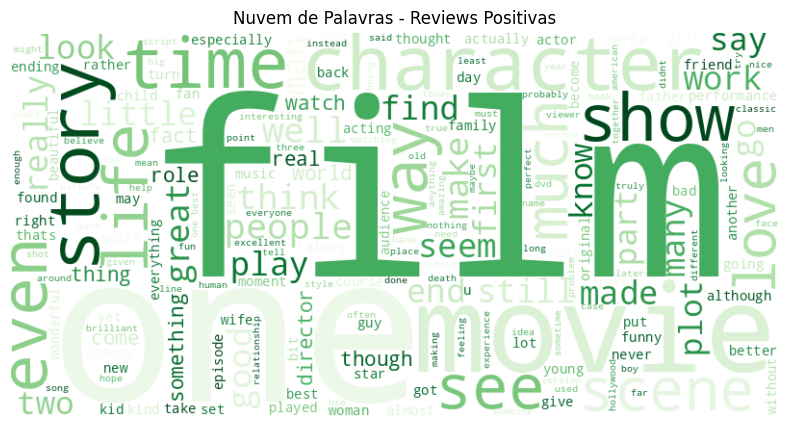

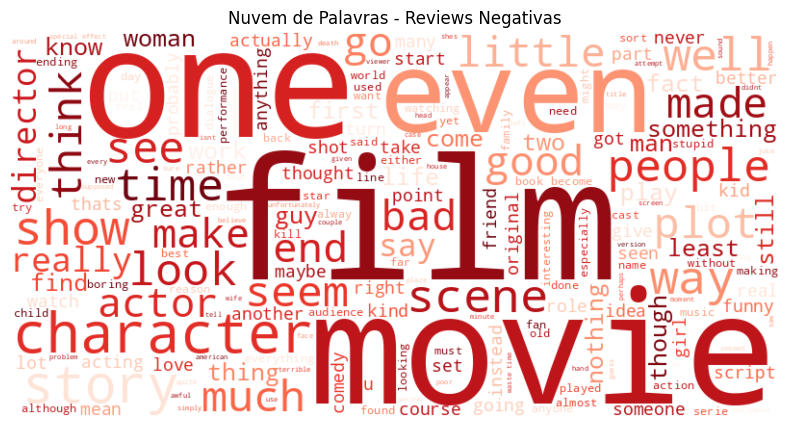

In [ ]:
#nuvem de palavras

from wordcloud import WordCloud

#positivas
text_pos = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Positivas')
plt.show()

#negativas
text_neg = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Negativas')
plt.show()

In [ ]:
#salva dataset pre-processado

save_csv = '/content/drive/MyDrive/dataset/imdb_preprocessado.csv'
df.to_csv(save_csv, index=False)
print(df[['review', 'processed_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  
